## Image denoising problem. 

**Aim:** To train an autoencoder to map noisy digits images to clean digits images.

### Load MNIST dataset and Generate noisy images

Run the below code to load and add noise to the original mnist images

In [0]:
import numpy as np
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  


noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

### Plot the noisy images

Run the below code to plot the noisy images

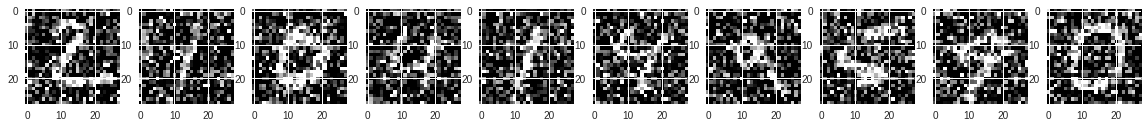

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
plt.show()

### Model

#### Consider the following while building the model.

1. Input layer with shape (28, 28, 1)
2. Conv2D with 32 filters with kernel size 3x3 with `relu` activation.
3. Max pooling with filter size 2x2 use padding `same` to retain the original image size.
4. Repeat step 2.
5. Repeat step 3.
6. Repeat step 2.
7. Upsampling with filter size 2x2.
8. Repeat step 2.
9. Repeat step 7.
10. Repeat step 2 with 1 filter to match the channels of image and `sigmoid` activation.
11. `binary_crossentropy` loss.


In [0]:
import tensorflow as tf
import keras
tf.keras.backend.clear_session()
model = keras.models.Sequential()


#Add first convolutional layer
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))

#Add MaxPooling layer
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=1,padding='same'))

#Add second convolutional layer
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))

#Add MaxPooling layer
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=1,padding='same'))

#Add third convolutional layer
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))

#Add MaxPooling layer
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=1,padding='same'))

#Upsampling
model.add(keras.layers.UpSampling2D(size=(2, 2)))

#Add fourth convolutional layer
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
          
#Upsampling

model.add(keras.layers.UpSampling2D(size=(2, 2)))
          
#Add fourth convolutional layer
model.add(keras.layers.Conv2D(1,kernel_size=(3,3),strides=3,input_shape=(28,28,1),activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 44, 44, 32)        0         
__________

### model.fit() to train with 100 epochs, batch_size as 1000.

with x_train_noisy as feature and x_train as label

with x_test_noisy as feature and x_test as label

In [7]:
#Train the model
model.fit(x_train_noisy,x_train,          
          validation_data=(x_test_noisy,x_test),
          epochs=10,
          batch_size=1000)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 491us/step - loss: 0.3987 - acc: 0.8018 - val_loss: 0.2730 - val_acc: 0.7809
Epoch 2/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.2483 - acc: 0.7947 - val_loss: 0.2342 - val_acc: 0.7979
Epoch 3/10
60000/60000 [==============================] - 26s 425us/step - loss: 0.2273 - acc: 0.7983 - val_loss: 0.2217 - val_acc: 0.7950
Epoch 4/10
60000/60000 [==============================] - 25s 424us/step - loss: 0.2178 - acc: 0.7981 - val_loss: 0.2210 - val_acc: 0.8037
Epoch 5/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.2123 - acc: 0.7985 - val_loss: 0.2088 - val_acc: 0.7960
Epoch 6/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.2073 - acc: 0.7985 - val_loss: 0.2052 - val_acc: 0.7956
Epoch 7/10
60000/60000 [==============================] - 25s 423us/step - loss: 0.2035 - acc: 0.7986 - val_loss: 0.

### Predict

Run the below code to get predictions of test set

In [0]:
denoised_imgs = model.predict(x_test_noisy)

### Plot 

Run the below code to check noised and denoised images. 

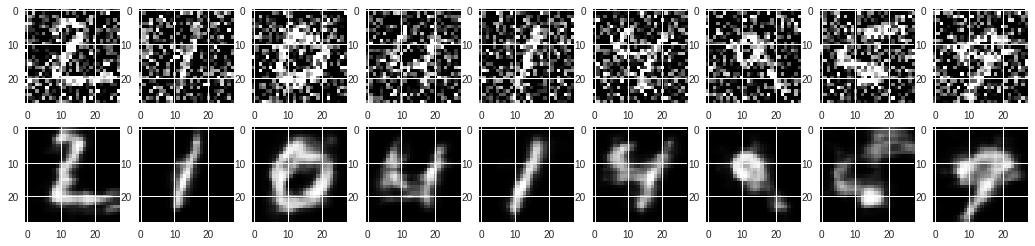

In [9]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display noisy images
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))

    # display denoised images
    ax = plt.subplot(2, n, i + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28))
plt.show()